## Ensembles of Decision Trees

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

Ensembles are methods that combine multiple machine learning models to create
more powerful models.

There are many models in the machine learning literature that belong to this category,
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: Random Forests and Gradient Boosted Decision Trees.

### Random Forests

As observed above, a main drawback of decision trees is that they tend to overfit the
training data.

Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.

The idea of random forests is that each tree might do a relatively good job of predicting,
but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results. This reduction in overfitting,
while retaining the predictive power of the trees, can be shown using rigorous
mathematics.

### Building & analyzing random forests

In [16]:
# use make_moon dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
                       
                        max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
                      
                        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5,
                      
                        n_jobs=1, oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

IndexError: index 2 is out of bounds for axis 1 with size 2

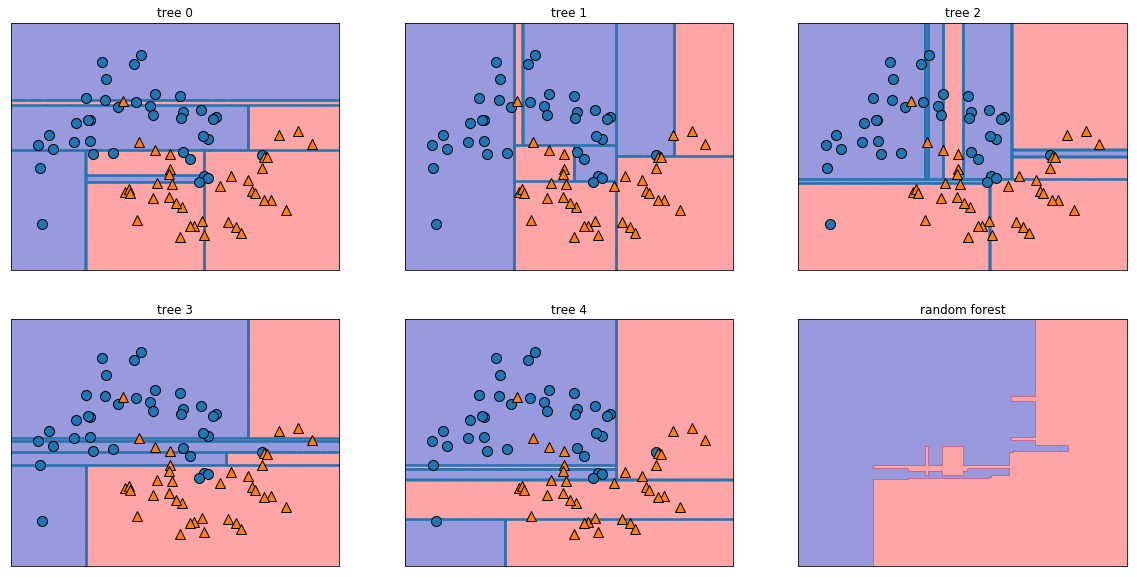

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree %d' % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
plt.scatter(X_train[:, 0], X_train[:, 2], c=np.array(['r', 'b'])[y_train], s=60)

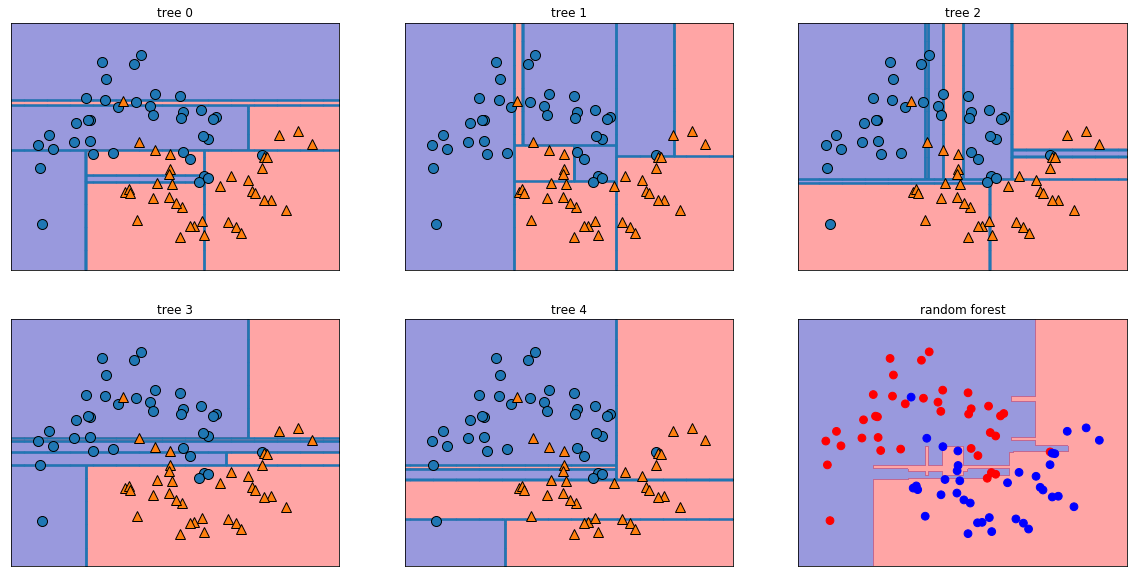

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

### Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

# By default, 100 trees of maximum depth three are used, with a learning rate of 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.958042


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting,
we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [28]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [29]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


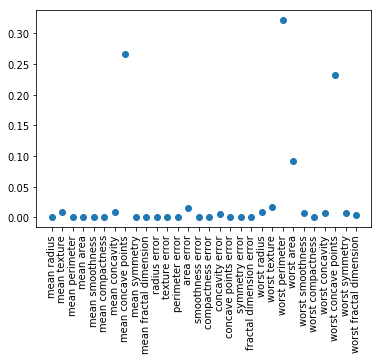

In [30]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);